In [1]:
import numpy as np
import matplotlib.pyplot as plt

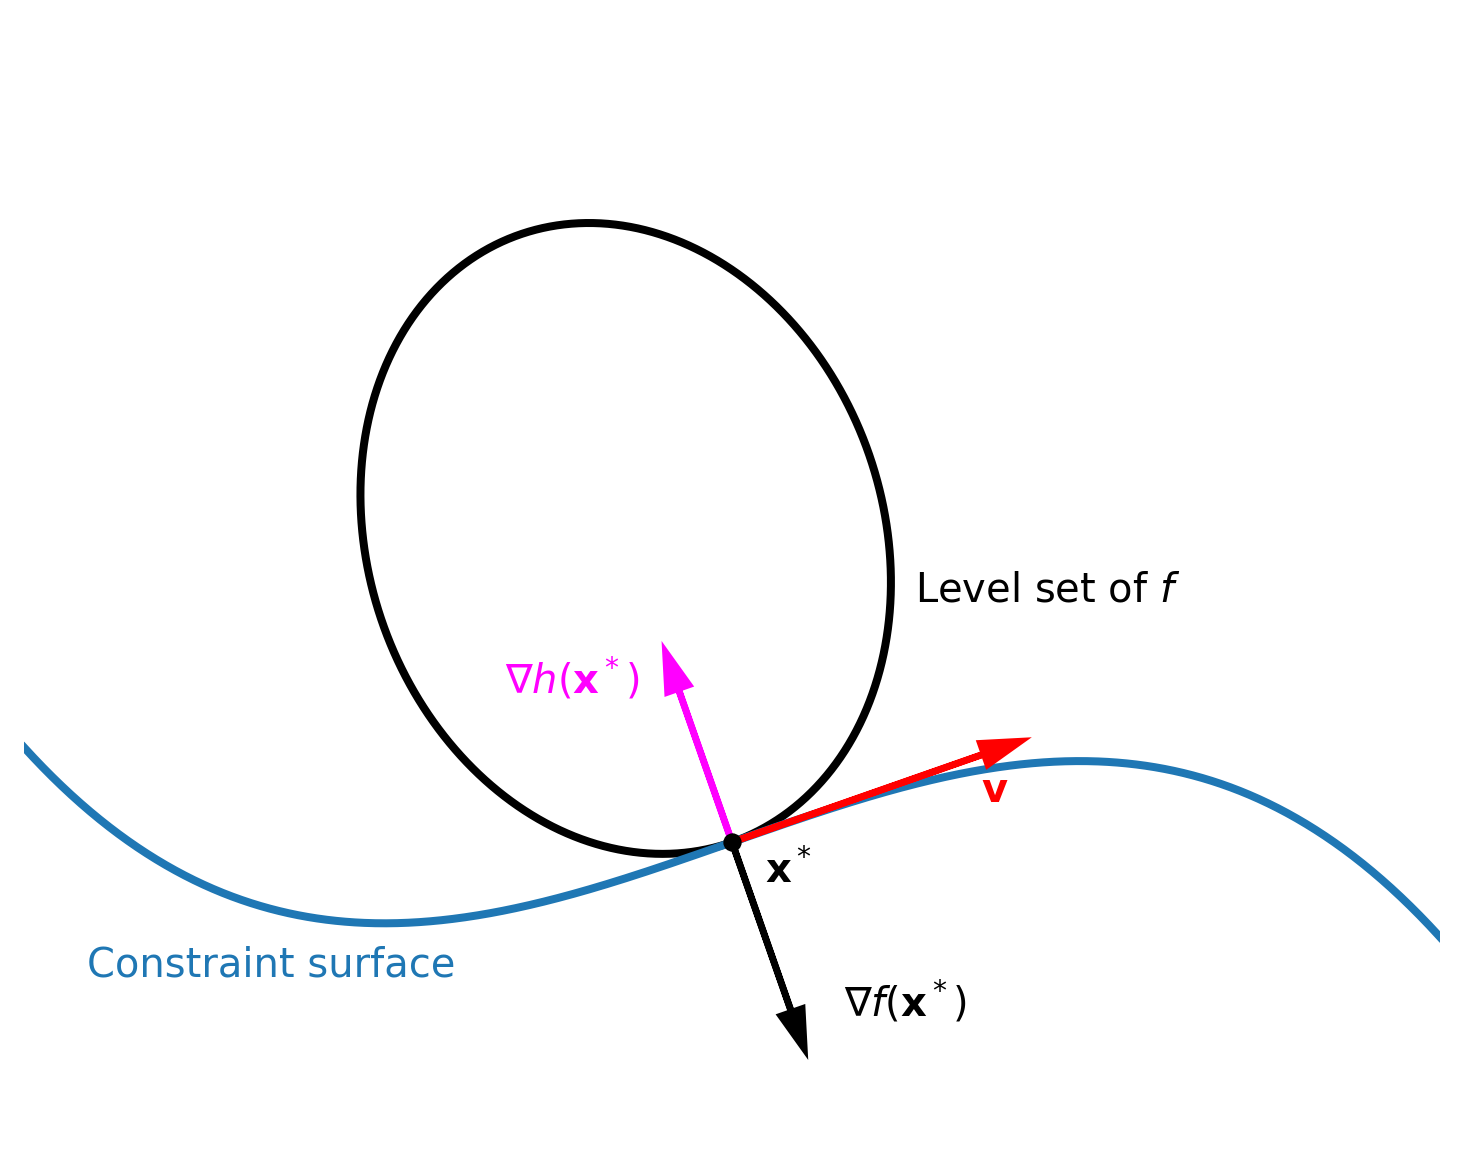

In [43]:
# ---------- Tunable parameters ----------
x_range = (-2.2, 2.2)
num_points = 900

# Desired tangent slope at x* for both curves
m = 0.35  # slope

# Ellipse axes (less elongated) and rotation
#a, b = 1.25, 1.05            # semi-axes lengths (closer -> less elongation)
a, b = 1, 0.8
phi = np.arctan(-1.0/m)      # rotation so that slope at x* equals m

# Constraint curve shape (tangent slope m at x* = (0,0))
h_cubic = 0.10               # controls curvature away from x*
tan_len = 0.95
grad_len = 0.68

# Colors
color_level  = "black"
color_constr = "tab:blue"
color_grad_f = "black"
#color_grad_h = "tab:blue"
color_grad_h = "magenta"
#color_tan    = "0.25"
color_tan    = "red"

# ---------- Define curves ----------
def constraint_y(x):
    # y = h(x) with slope m at 0 and cubic term to bend the curve
    return m * x - h_cubic * x**3

def constraint_y_prime(x):
    return m - 3*h_cubic * x**2

# Ellipse centered so that t=0 is exactly at x*=(0,0)
xc = -a * np.cos(phi)
yc = -a * np.sin(phi)

t = np.linspace(0, 2*np.pi, num_points)
R = np.array([[np.cos(phi), -np.sin(phi)],
              [np.sin(phi),  np.cos(phi)]])
ellipse_pts = R @ np.vstack((a*np.cos(t), b*np.sin(t)))
ellipse_pts[0, :] += xc
ellipse_pts[1, :] += yc

# ---------- Vectors at x* ----------
x_star, y_star = 0.0, 0.0

# Tangent direction along constraint at x*
tan_vec = np.array([1.0, m], float)
tan_vec = tan_vec / np.linalg.norm(tan_vec) * tan_len

# Gradient to level set at x*: normal to ellipse at t=0 is (cos φ, sin φ)
grad_f = np.array([np.cos(phi), np.sin(phi)], float)
grad_f = grad_f / np.linalg.norm(grad_f) * grad_len

# Gradient to constraint at x*: ∇h = (-h'(0), 1) = (-m, 1)
grad_h = np.array([-m, 1.0], float)
grad_h = grad_h / np.linalg.norm(grad_h) * grad_len

# ---------- Plot ----------
fig, ax = plt.subplots(figsize=(6.2, 6.2), dpi=240)

# Draw curves
xs = np.linspace(*x_range, num_points)
ax.plot(ellipse_pts[0], ellipse_pts[1], linewidth=2.4, color=color_level)
ax.plot(xs, constraint_y(xs), linewidth=2.4, color=color_constr)

# Labels for curves (with white boxes to avoid overlap)
ax.annotate(r"Level set of $f$",
            xy=(ellipse_pts[0, int(0.1*len(t))], ellipse_pts[1, int(0.1*len(t))]),
            xytext=(18, 40), textcoords='offset points', fontsize=12, color=color_level,
            bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='none', alpha=0.85))

ax.annotate(r"Constraint surface",
            xy=(xs[40], constraint_y(xs[40])),
            xytext=(0, -50), textcoords='offset points', fontsize=12, color=color_constr,
            bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='none', alpha=0))

# Mark x*
ax.plot([x_star], [y_star], marker='o', markersize=4.5, color='black', zorder=5)
ax.annotate(r"$\mathbf{x}^*$", xy=(x_star, y_star),
            xytext=(10, -12), textcoords='offset points', fontsize=12,
            bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='none', alpha=0.9))

# ∇f(x*) arrow + label
ax.arrow(x_star, y_star, grad_f[0], grad_f[1],
         length_includes_head=True, head_width=0.07, head_length=0.12,
         linewidth=2, color=color_grad_f, zorder=3)
ax.annotate(r"$\nabla f(\mathbf{x}^*)$", xy=(x_star + grad_f[0], y_star + grad_f[1]),
            xytext=(12, 10), textcoords='offset points', fontsize=12, color=color_grad_f,
            bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='none', alpha=0.85))

# ∇h(x*) arrow + label (same blue as constraint)
ax.arrow(x_star, y_star, grad_h[0]*0.92, grad_h[1]*0.92,
         length_includes_head=True, head_width=0.07, head_length=0.12,
         linewidth=2, color=color_grad_h, zorder=3)
ax.annotate(r"$\nabla h(\mathbf{x}^*)$", xy=(x_star + grad_h[0]*0.92, y_star + grad_h[1]*0.92),
            xytext=(-48, -12), textcoords='offset points', fontsize=12, color=color_grad_h,
            bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='none', alpha=0.85))

# Tangent direction along constraint
ax.arrow(x_star, y_star, tan_vec[0], tan_vec[1],
         length_includes_head=True, head_width=0.07, head_length=0.12,
         linewidth=2, color=color_tan, zorder=2)
ax.annotate(r"$\mathbf{v}$", xy=(x_star + tan_vec[0], y_star + tan_vec[1]),
            xytext=(-12, -18), textcoords='offset points', fontsize=12, color=color_tan,
            bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='none', alpha=0))

# Style
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(x_range)
yvals = np.concatenate([ellipse_pts[1], constraint_y(xs)])
pad = 0.28 * (yvals.max() - yvals.min())
ax.set_ylim(yvals.min() - pad, yvals.max() + pad)
ax.axis('off')
plt.tight_layout()

fig.savefig('figures/lagrange_method_geometry.pdf', bbox_inches='tight')